# 結果比較

In [1]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [4]:
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: unset; }</style>"))

In [2]:
# 比較元
BEFORE_CSV = os.path.join('/home', 'jovyan', 'work', 'result', '20230402_0910_beam-time-limit_02_testset_sys_main.csv')
before_df = pd.read_csv(BEFORE_CSV)

# 比較先
#AFTER_CSV = os.path.join('/home', 'jovyan', 'work', 'result', '20230320_0723_dynamic-size-try-500_02_testset_sys_main.csv')
AFTER_CSV = os.path.join('/home', 'jovyan', 'work', 'result', '20230402_1452_min-block-time-limit_02_testset_sys_main.csv')
after_df = pd.read_csv(AFTER_CSV)

In [29]:
after_df.columns

Index(['testset', 'seed', 'D', 'time', 'score', 'rel_score', 'block_cnt',
       'disuse_block_size', 'size01', 'size04', 'size09', 'size29', 'size30',
       'best_score_blk_cnt', 'result'],
      dtype='object')

In [30]:
compare_cols = ['score', 'block_cnt', 'disuse_block_size', 'size01', 'size04', 'size09', 'size29', 'size30', 'time']

before_df.columns = [c + '_before' if c in compare_cols else c for c in before_df.columns]

cols = compare_cols.copy()
cols.append('seed')
after_df = after_df[cols]
after_df.columns = [c + '_after' if c in compare_cols else c for c in after_df.columns]

In [31]:
merge_df = pd.merge(before_df, after_df, on=['seed'], how='left')
f = np.isnan(merge_df['score_after'])
merge_df = merge_df[~f]

In [32]:
# コスト目標
#cost_lb_path = os.path.join('/home', 'jupyter', 'work', 'result', 'min_cost', '20230219_1753_greedy_03_testset_stress_main.csv')
#cost_lb_df = pd.read_csv(cost_lb_path)

In [33]:
#merge_df = pd.merge(merge_df, cost_lb_df[['seed', 'min_cost']], on='seed')
#merge_df['total_power_rate_before'] = merge_df['total_power_before'] / merge_df['min_cost']
#merge_df['total_power_rate_after'] = merge_df['total_power_after'] / merge_df['min_cost']

In [34]:
merge_df['score_before'].describe()

count    2.000000e+03
mean     1.804108e+09
std      2.985400e+09
min      5.456291e+07
25%      4.449745e+08
50%      9.008754e+08
75%      1.931207e+09
max      4.984984e+10
Name: score_before, dtype: float64

In [35]:
merge_df['score_after'].describe()

count    2.000000e+03
mean     1.599488e+09
std      1.818871e+09
min      4.290480e+07
25%      5.198883e+08
50%      1.102222e+09
75%      2.001104e+09
max      3.116154e+10
Name: score_after, dtype: float64

In [36]:
#merge_df.sort_values('score_after', ascending=False)

## 全体比較(コスト)

In [37]:
def y_plot(y):
    val_list = []
    
    for postfix in ('before', 'after'):
        col = y + '_' + postfix
        
        val = np.mean(merge_df[col])
        val_list.append(val)
        
        print('{}: {:.1f}'.format(postfix, val))
    
    plt.title(y)
    plt.bar(['before', 'after'], val_list);

before: 1804107953.2
after: 1599488179.4


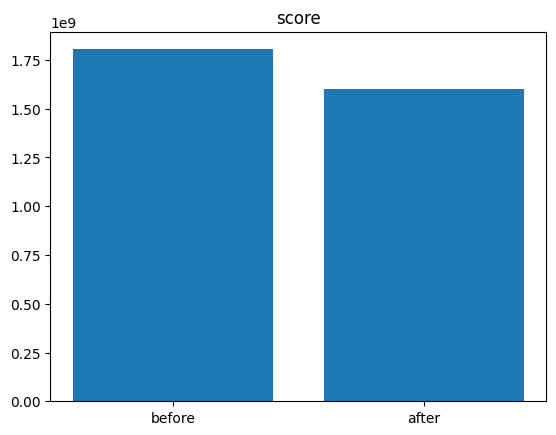

In [38]:
y_plot('score')

before: 8.8
after: 8.4


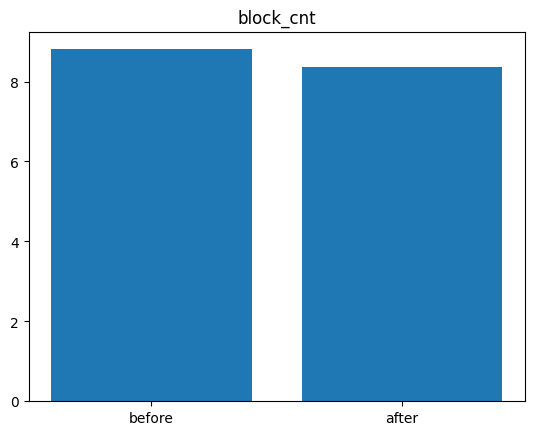

In [39]:
y_plot('block_cnt')

before: 0.4
after: 0.0


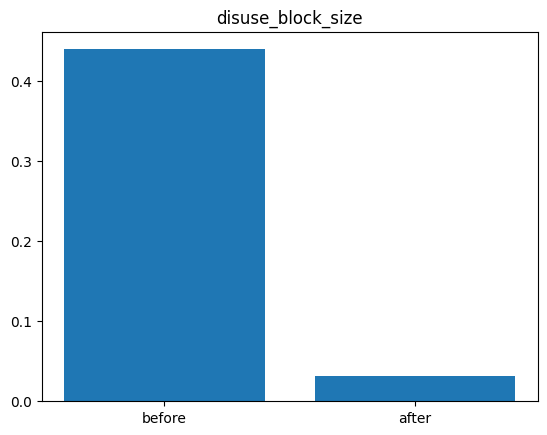

In [40]:
y_plot('disuse_block_size')

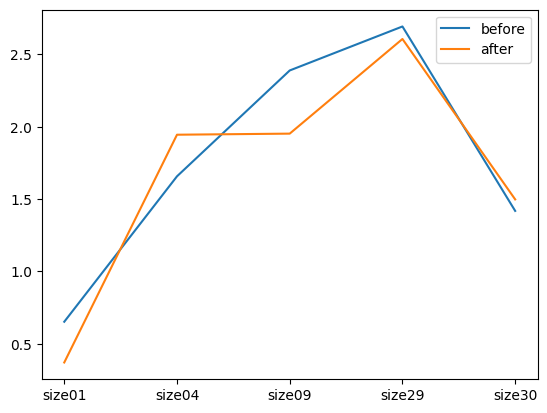

In [41]:
size_cols = ['size01', 'size04', 'size09', 'size29', 'size30']

before_size = [np.mean(merge_df[col + '_before']) for col in size_cols]
after_size = [np.mean(merge_df[col + '_after']) for col in size_cols]

plt.plot(size_cols, before_size, label='before')
plt.plot(size_cols, after_size, label='after')

plt.legend();

In [42]:
def xy_plot(x, y):
    plot_df = merge_df.groupby(x).mean(numeric_only=True)
    
    fig = plt.figure()
    ax1 = fig.add_subplot()

    for postfix in ('before', 'after'):
        col = y + '_' + postfix

        ax1.plot(plot_df.index, plot_df[col], label=postfix)

    plt.title(y)
    plt.xlabel(x)
    
    ax2 = ax1.twinx()
    ax2.hist(merge_df[x], alpha=0.3)
    ax2.set_ylim([0, 2000])
    
    ax1.legend();

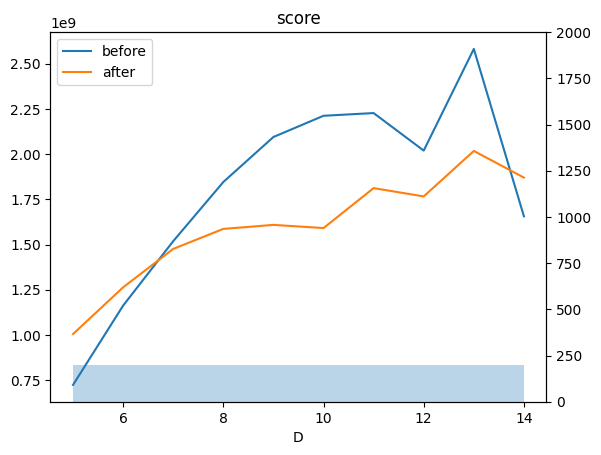

In [43]:
xy_plot('D', 'score')

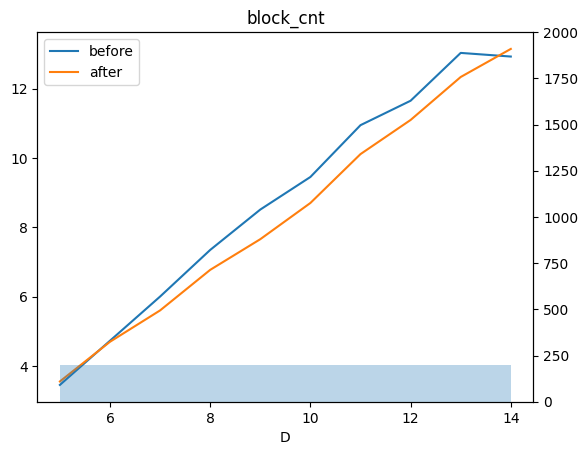

In [44]:
xy_plot('D', 'block_cnt')

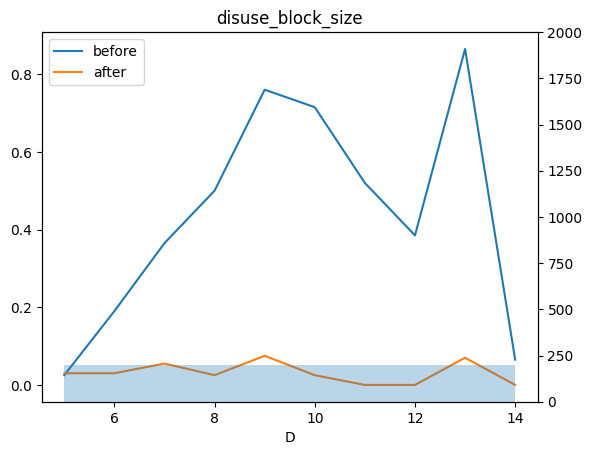

In [45]:
xy_plot('D', 'disuse_block_size')

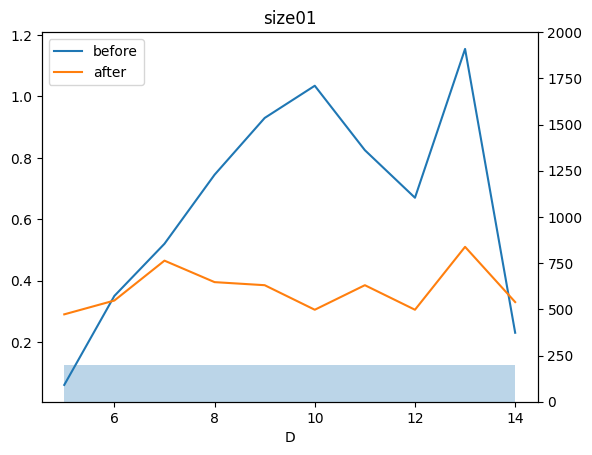

In [46]:
xy_plot('D', 'size01')

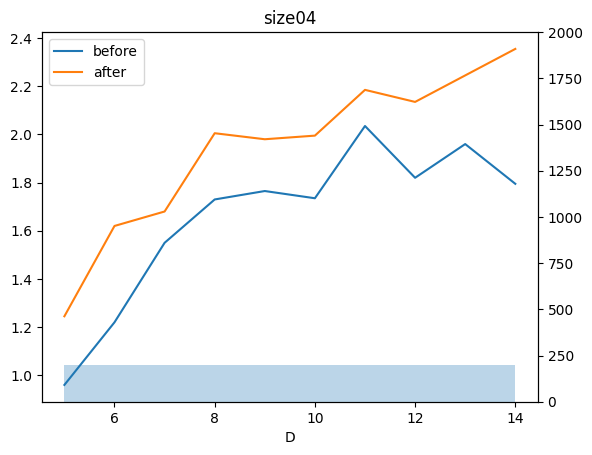

In [47]:
xy_plot('D', 'size04')

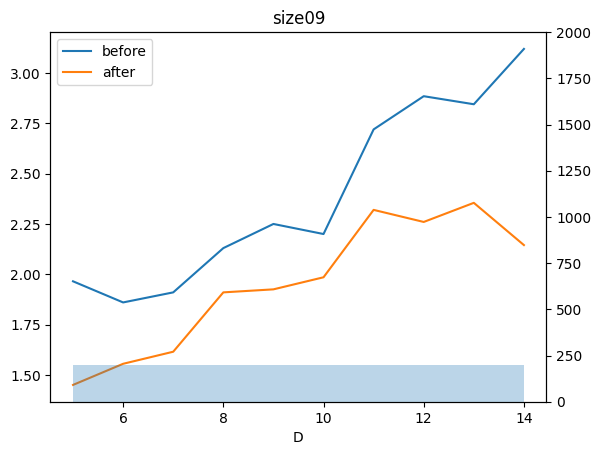

In [48]:
xy_plot('D', 'size09')

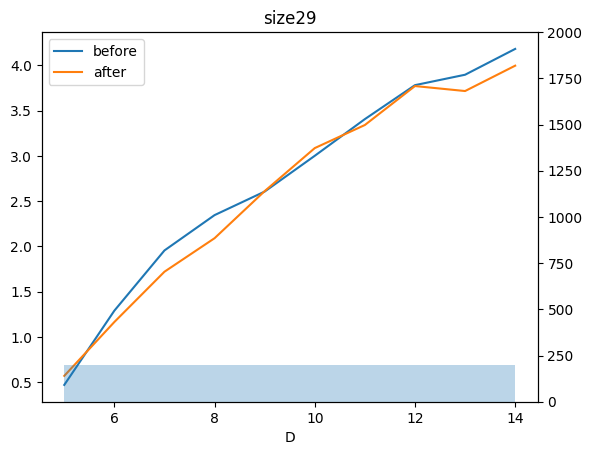

In [49]:
xy_plot('D', 'size29')

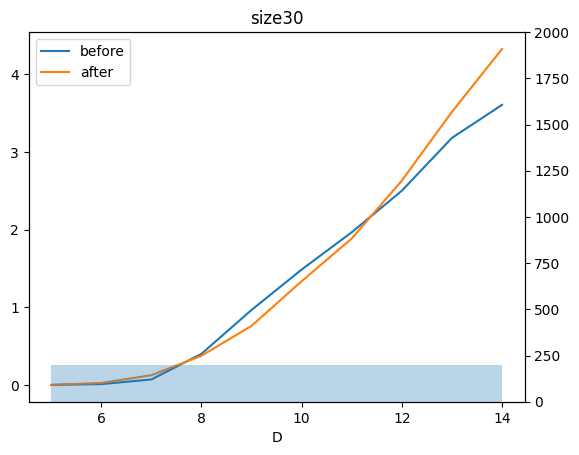

In [50]:
xy_plot('D', 'size30')

## コスト目標比率

In [96]:
#y_plot('total_power_rate')

In [97]:
#xy_plot('W', 'total_power_rate')

In [98]:
#xy_plot('K', 'total_power_rate')

In [99]:
#xy_plot('C', 'total_power_rate')

In [4]:
info_df = pd.read_csv(os.path.join('/home', 'jovyan', 'work', '01_testset', '03_testset_stress_info.csv'))

In [5]:
info_df

,seed,D,problem,zx_open_1,zy_open_1,x_width_1,y_width_1,zx_open_2,zy_open_2,x_width_2,...,m_1,M_1,c_1,m_2,M_2,c_2,add_block,score_lb,estim_blk_size,difficulty
0,0,5,5 10001 11011 11111 10101 10001 01110 11011 10...,9,10,5,5,9,10,5,...,19,43,1,16,53,1,0,23255814,4,7
1,7,6,6 001111 000011 000101 000111 000011 000110 11...,21,22,4,4,18,18,5,...,23,53,1,17,38,1,0,26315789,5,7
2,12,7,7 0001010 0001110 0000011 0000111 0000011 0111...,27,32,6,5,35,26,3,...,24,48,1,23,58,1,0,20833333,4,3
3,1,8,8 00110000 00100000 00111000 11100000 01001000...,45,42,5,7,32,36,8,...,39,102,1,25,57,1,0,17543860,10,8
4,9,9,9 111000000 010100000 111111000 111110100 0111...,44,56,8,6,60,52,7,...,44,96,1,31,74,1,0,13513514,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9960,9,9 000000111 000011111 000011111 000001111 0000...,48,42,5,6,44,53,7,...,44,103,1,43,142,1,0,9708738,3,1
9996,9973,9,9 000000110 000011111 000011111 000011111 0000...,41,47,5,5,48,47,5,...,41,155,1,38,127,1,0,7874016,3,1
9997,9977,9,9 000000111 000011111 000001110 000011110 0001...,41,51,8,6,53,43,6,...,42,133,1,39,120,1,0,8333333,6,4
9998,9984,9,9 000000100 000000111 000000011 000001011 0000...,56,49,6,9,59,51,7,...,37,94,1,33,78,1,0,12820513,10,7


In [25]:
check_df = pd.merge(after_df, info_df[['seed', 'estim_blk_size', 'difficulty']], on='seed', how='left')
check_df = check_df.query('D==14')

In [26]:
np.min(check_df['best_score_blk_cnt'] - check_df['estim_blk_size'])

-15

In [27]:
np.max(check_df['best_score_blk_cnt'] - check_df['estim_blk_size'])

6